# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns 


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

In [3]:
#Información general de las llamadas
calls.info()
print()
#Información general del trafico de internet
internet.info()
print()
#Información general de mensajes
messages.info()
print()
#Información general de los planes
plans.info()
print()
#Información general de los usuarios
users.info()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  D

Con la información general de cada tabla, se observan problemas en el tipo de datos de algunas columnas referente a las fechas. Mas adelante, se realizarán las correcciones al tipo de dato adecuado.

## Preparar los datos

**Tarifas**

**Imprime la información general/resumida sobre el DataFrame de las tarifas**

In [4]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


**Imprime una muestra de los datos para las tarifas**

In [5]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

In [6]:
# Revisamos si hay filas totalmente duplicadas
print("número de duplicados: ", plans.duplicated().sum())
print()
# Revisamos si datos ausentes
print("numero de datos ausentes por columna:")
print()
print(plans.isna().sum()) 

número de duplicados:  0

numero de datos ausentes por columna:

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


En cuanto a las tarifas, no se observan datos duplicados o ausentes.

## Enriquecer los datos

Para efectos de este proyecto trabajaremos el tráfico de datos en Gb, para ello la columna original "mb_per_month_included"
se dividirá entre 1024.

In [7]:
#Pasaremos de mb a gb agregando una nueva columna
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024
#Eliminamos la columna 'mb_per_month_included'
plans.drop('mb_per_month_included',axis=1,inplace=True)
display(plans)


,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


Se observa un mayor costo monetario mensual para el plan ultimate, lo que conlleva a un beneficio mas completo tanto para
mensajes, minutos y datos. Por otro lado, si el usuario con el beneficio plan surf supera el límite de su paquete, su cargo
monetario por el uso de Gb, mensajes y minutos adicionales al plan, es mayor al plan ultimate.

## Usuarios/as

**Imprime la información general/resumida sobre el DataFrame de usuarios**

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Imprime una muestra de datos para usuarios**

In [9]:
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Corregir los datos

In [10]:
# Revisamos si hay filas totalmente duplicadas
print("número de duplicados: ", users.duplicated().sum())
print()
# Revisamos si hay valores ausentes
print("numero de datos ausentes por columna:")
print()
print(users.isna().sum())


número de duplicados:  0

numero de datos ausentes por columna:

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


En cuanto a los usuarios, no se observan datos duplicados, pero si valores ausentes en la columna "churn_date"

## Enriquecer los datos

Vemos que hay valores ausentes para la comuna "churn_date", sin embargo, dejaremos de esa forma la columna,
dado que nos aporta información de los usuarios que siguen activos en sus planes.

In [11]:
#Cambiaremos el tipo de dato de la columna "churn_date" a tipo datetime

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.head()
print()
#Nuevamente verificamos que el tipo de dato sea el correcto para cada columna
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


De la columna "churn_date" Se observa que aún siguen activos 34 usuarios al momento de recopilar la data.

## Llamadas

**Imprime la información general/resumida sobre el DataFrame de las llamadas**

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


**Imprime una muestra de datos para las llamadas**

In [13]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Corregir los datos

In [14]:
# Revisamos si hay filas totalmente duplicadas
print("número de duplicados: ", calls.duplicated().sum())
print()
# Revisamos si datos ausentes
print("numero de datos ausentes por columna:")
print()
print(calls.isna().sum())

número de duplicados:  0

numero de datos ausentes por columna:

id           0
user_id      0
call_date    0
duration     0
dtype: int64


En cuanto a las llamadas, no se observan datos duplicados o ausentes.

### Enriquecer los datos

In [15]:
#Cambiaremos el tipo de dato de la columna "churn_date" a tipo datetime

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#Nuevamente verificamos que el tipo de dato sea el correcto para cada columna
print()
calls.info()
print()

#Por politicas de empresa, redondeamos los segundos a minutos de la columna "duration"

print("Nueva columna con datos redondeados")

calls['duration_round'] = calls['duration'].apply(np.ceil)
calls.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

Nueva columna con datos redondeados


,id,user_id,call_date,duration,duration_round
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


Por politicas de empresa, redondeamos los segundos a minutos de la columna "duration". Con este cambio, se agregó una nueva columna llamada "duration_round".

## Mensajes

**Imprime la información general/resumida sobre el DataFrame de los mensajes**

In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**Imprime una muestra de datos para los mensajes**

In [17]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corregir los datos

In [18]:
# Revisamos si hay filas totalmente duplicadas
print("número de duplicados: ", messages.duplicated().sum())
print()
# Revisamos si datos ausentes
print("numero de datos ausentes por columna:")
print()
print(messages.isna().sum())

número de duplicados:  0

numero de datos ausentes por columna:

id              0
user_id         0
message_date    0
dtype: int64


En cuanto a los mensajes, no se observan datos duplicados o ausentes y los tipos de datos son correctos.

### Enriquecer los datos

In [19]:
#Cambiaremos el tipo de dato de la columna "churn_date" a tipo datetime

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.head()
print()
#Nuevamente verificamos que el tipo de dato sea el correcto para cada columna
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

**Imprime la información general/resumida sobre el DataFrame de internet**

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


**Imprime una muestra de datos para el tráfico de internet**

In [21]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corregir los datos

In [22]:
# Revisamos si hay filas totalmente duplicadas
print("número de duplicados: ", internet.duplicated().sum())
print()
# Revisamos si datos ausentes
print("numero de datos ausentes por columna:")
print()
print(internet.isna().sum())

número de duplicados:  0

numero de datos ausentes por columna:

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


En cuanto a internet, no se observan datos duplicados o ausentes y los tipos de datos son correctos.

### Enriquecer los datos

In [23]:
#Cambiaremos el tipo de dato de la columna "session_date" a tipo datetime

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#Nuevamente verificamos que el tipo de dato sea el correcto para cada columna

internet.info()
print()

#pasamos los mb a gb

internet['gb_used'] = internet['mb_used']/1024
print("imprimiremos otra muestra:")
display(internet.head())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

imprimiremos otra muestra:


,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


Para efectos de este proyecto trabajaremos el tráfico de datos en Gb, para ello la columna original "mb_used"
se dividirá entre 1024, para así, obtener una nueva columna "gb_used".

## Estudiar las condiciones de las tarifas

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te queda.
display(plans)

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


**Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.**

In [25]:
#Extraer el mes de la llamada
calls['mes_año'] = calls['call_date'].dt.to_period('M')
#display(calls)

#Calcular el número de llamadas hechas por cada usuario al mes
calls_users = calls.groupby(['user_id','mes_año'])['id'].size().reset_index(name='calls_made')
calls_users = calls_users.fillna(0)
display(calls_users)



,user_id,mes_año,calls_made
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


**Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.**

In [26]:
calls_duration = calls.groupby(['user_id','mes_año'])['duration_round'].sum().reset_index(name='duration_calls')
calls_duration = calls_duration.fillna(0)
display(calls_duration)


,user_id,mes_año,duration_calls
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


**Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.**

In [27]:
#Extraer el mes de la llamada
messages['mes_año'] = messages['message_date'].dt.to_period('M')
#display(messages)
quantity_messages = messages.groupby(['user_id','mes_año'])['id'].size().reset_index(name='message_count')

quantity_messages = quantity_messages.fillna(0)
display(quantity_messages)




,user_id,mes_año,message_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


**Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.**

In [28]:
internet['mes_año'] = internet['session_date'].dt.to_period('M')
#display(internet.head())


internet_trafic = internet.groupby(['user_id','mes_año'])['gb_used'].sum().reset_index(name='trafic_users')
internet_trafic['trafic_users'] = np.ceil(internet_trafic['trafic_users'])
internet_trafic = internet_trafic.fillna(0)

display(internet_trafic)

,user_id,mes_año,trafic_users
0,1000,2018-12,2.0
1,1001,2018-08,7.0
2,1001,2018-09,14.0
3,1001,2018-10,22.0
4,1001,2018-11,19.0
...,...,...,...
2272,1498,2018-12,23.0
2273,1499,2018-09,13.0
2274,1499,2018-10,20.0
2275,1499,2018-11,17.0


**Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month**

In [29]:
#Fusionar numero de llamadas y duración de llamadas
merged_calls = calls_users.merge(calls_duration, on = ['user_id','mes_año'],how='outer')
#display(merged_calls)

#Fusionar tabla anterior con cantidad de mensajes enviados.
merged_messages = merged_calls.merge(quantity_messages, on = ['user_id','mes_año'], how='outer')
#display(merged_messages)

#Fusionar  tabla anterior con trafico de internet
merged_internet = merged_messages.merge(internet_trafic, on = ['user_id','mes_año'], how='outer')
display(merged_internet)

,user_id,mes_año,calls_made,duration_calls,message_count,trafic_users
0,1000,2018-12,16.0,124.0,11.0,2.0
1,1001,2018-08,27.0,182.0,30.0,7.0
2,1001,2018-09,49.0,315.0,44.0,14.0
3,1001,2018-10,65.0,393.0,53.0,22.0
4,1001,2018-11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13.0
2289,1361,2018-05,NaN,NaN,2.0,2.0
2290,1482,2018-10,NaN,NaN,2.0,NaN
2291,1108,2018-12,NaN,NaN,NaN,1.0


**Añade la información de la tarifa**

In [30]:
#Fusionamos tabla resultante con las columnas "user_id " y "plan" del dataframe "users"
merged_plans = merged_internet.merge(users[['user_id','plan']], on ='user_id', how='left')
#display(merged_plans)

merged_df = merged_plans.merge(plans, left_on='plan',right_on='plan_name', how='left')
merged_df.drop('plan_name',axis=1,inplace=True)

#Eliminamos los valores nulos de cada tabla
merged_df['calls_made'] = merged_df['calls_made'].fillna(0)
merged_df['duration_calls'] = merged_df['duration_calls'].fillna(0)
merged_df['message_count'] = merged_df['message_count'].fillna(0)
merged_df['trafic_users'] = merged_df['trafic_users'].fillna(0)

display(merged_df)

,user_id,mes_año,calls_made,duration_calls,message_count,trafic_users,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,16.0,124.0,11.0,2.0,ultimate,1000,3000,70,7,0.01,0.01,30.0
1,1001,2018-08,27.0,182.0,30.0,7.0,surf,50,500,20,10,0.03,0.03,15.0
2,1001,2018-09,49.0,315.0,44.0,14.0,surf,50,500,20,10,0.03,0.03,15.0
3,1001,2018-10,65.0,393.0,53.0,22.0,surf,50,500,20,10,0.03,0.03,15.0
4,1001,2018-11,64.0,426.0,36.0,19.0,surf,50,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,0.0,0.0,61.0,13.0,surf,50,500,20,10,0.03,0.03,15.0
2289,1361,2018-05,0.0,0.0,2.0,2.0,surf,50,500,20,10,0.03,0.03,15.0
2290,1482,2018-10,0.0,0.0,2.0,0.0,ultimate,1000,3000,70,7,0.01,0.01,30.0
2291,1108,2018-12,0.0,0.0,0.0,1.0,ultimate,1000,3000,70,7,0.01,0.01,30.0


**Calcula el ingreso mensual para cada usuario**

Creamos una nueva columna para mostrar los ingresos por mensajes. De la cantidad de mensajes totales de cada usuario
restamos los mensajes incluidos en el plan. Si la cantidad es negativa, retorna valor 0, en caso contrario, el valor arrojado
se multiplica por el valor monetario de cada mensaje ('usd_per_message').

In [31]:
#Función para calcular ingresos por mensaje

merged_df['income_messages'] = (merged_df['message_count']-merged_df['messages_included']).clip(0, None)*merged_df['usd_per_message']

Creamos una nueva columna para mostrar los ingresos por llamadas. De la duración de llamadas  totales de cada usuario
restamos la duración que ofrece en el plan. Si la cantidad es negativa, retorna valor 0, en caso contrario, el valor arrojado
se multiplica por el valor monetario de la duración adicional de cada llamada (''usd_per_minute').

In [32]:
#calcular ingresos por llamadas

merged_df['income_calls'] = (merged_df['duration_calls']-merged_df['minutes_included']).clip(0, None)*merged_df['usd_per_minute']

Creamos una nueva columna para mostrar los ingresos por trafico de internet. De la cantidad de trafico total por cada usuario
restamos el trafico incluido en el plan. Si la cantidad es negativa, retorna valor 0, en caso contrario, el valor arrojado
se multiplica por el valor monetario de trafico adicional ('gb_per_month_included').


In [33]:
#calcular ingresos por trafico de internet

merged_df['income_internet'] = (merged_df['trafic_users']-merged_df['gb_per_month_included']).clip(0, None)*merged_df['usd_per_gb']

In [34]:
#Eliminamos los valores nulos
merged_df['income_messages'] = merged_df['income_messages'].fillna(0)
merged_df['income_internet'] = merged_df['income_internet'].fillna(0)
merged_df['income_calls'] = merged_df['income_calls'].fillna(0)

#Calculamos el ingreso total
merged_df['income_total'] = merged_df['income_messages'] + merged_df['income_calls'] + merged_df['income_internet'] + merged_df['usd_monthly_pay']

display(merged_df)

,user_id,mes_año,calls_made,duration_calls,message_count,trafic_users,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,income_messages,income_calls,income_internet,income_total
0,1000,2018-12,16.0,124.0,11.0,2.0,ultimate,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
1,1001,2018-08,27.0,182.0,30.0,7.0,surf,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0,20.00
2,1001,2018-09,49.0,315.0,44.0,14.0,surf,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0,20.00
3,1001,2018-10,65.0,393.0,53.0,22.0,surf,50,500,20,10,0.03,0.03,15.0,0.09,0.0,70.0,90.09
4,1001,2018-11,64.0,426.0,36.0,19.0,surf,50,500,20,10,0.03,0.03,15.0,0.00,0.0,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,0.0,0.0,61.0,13.0,surf,50,500,20,10,0.03,0.03,15.0,0.33,0.0,0.0,20.33
2289,1361,2018-05,0.0,0.0,2.0,2.0,surf,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0,20.00
2290,1482,2018-10,0.0,0.0,2.0,0.0,ultimate,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
2291,1108,2018-12,0.0,0.0,0.0,1.0,ultimate,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00


## Estudia el comportamiento de usuario

### Llamadas

plan,mes_año,surf,ultimate
0,2018-01,203.000000,193.500000
1,2018-02,297.000000,403.142857
2,2018-03,330.000000,304.250000
3,2018-04,351.540000,336.857143
4,2018-05,399.584416,406.241379
5,2018-06,431.298969,370.957447
6,2018-07,449.983471,427.067797
7,2018-08,410.111111,421.436620
8,2018-09,414.226804,437.511628
9,2018-10,429.729958,450.735849


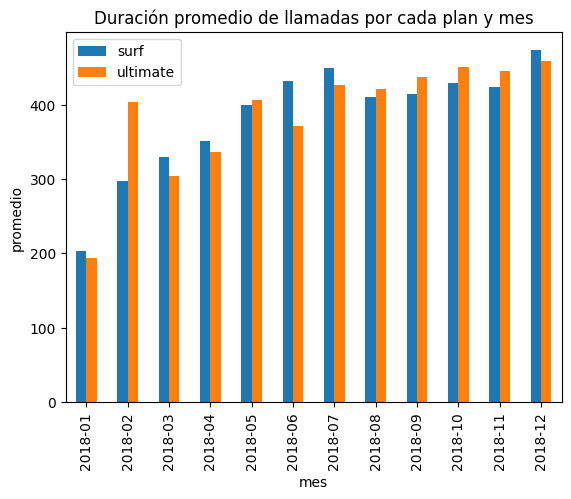

In [35]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras

pivot_calls = merged_df.pivot_table(index='mes_año',
                            columns='plan',
                            values='duration_calls',
                            aggfunc='mean'
                           ).reset_index()
display(pivot_calls)



pivot_calls.plot(x='mes_año',
        kind='bar',
        title='Duración promedio de llamadas por cada plan y mes',
        xlabel='mes',
        ylabel='promedio')

plt.legend(['surf', 'ultimate'])
plt.show() 



Se observa que en los meses de enero, marzo, abril, junio, julio y diciembre, los usuarios consumieron más minutos en el plan surf, mientras que en febrero, mayo, agosto, septiembre, octubre y noviembre, los usuarios consumieron más minutos en el plan ultimate. Es decir, en 6 meses para cada plan hubo un consumo mayor respecto al otro.

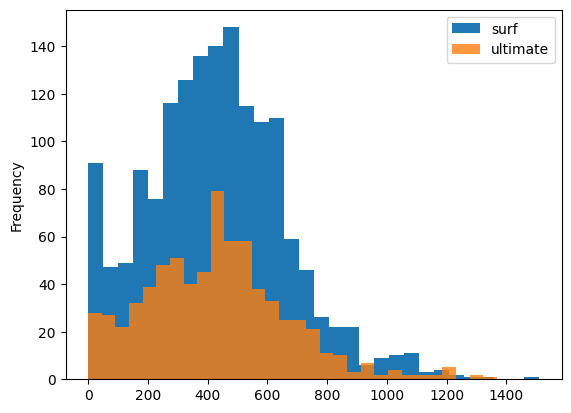

In [36]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

merged_df[merged_df['plan'] == 'surf']['duration_calls'].plot(kind='hist', bins=30)

merged_df[merged_df['plan'] == 'ultimate']['duration_calls'].plot(kind='hist', bins=30, alpha=0.8)

plt.legend(['surf', 'ultimate']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.show() 



Se observa que entre los 0 y 1100 minutos, los usuarios optan con mayor freccuencia el plan surf. Alrrededor de los 1200 o mas minutos los utuarios prefieren el plan ultimate. A partir de los 700 minutos la brecha de frecuencia entre ambos planes va disminuyendo.

In [37]:
# Calcula la media y la varianza de la duración mensual de llamadas.

estadistic_surf = merged_df[merged_df['plan'] == 'surf']

print("la media de los usuarios del plan surf es de ",estadistic_surf['duration_calls'].mean())
print("la varianza de los usuarios del plan surf es de ", np.var(estadistic_surf['duration_calls']))

print()

estadistic_ultimate = merged_df[merged_df['plan'] == 'ultimate']

print("la media de los usuarios del plan ultimate es de ",estadistic_ultimate['duration_calls'].mean())
print("la varianza de los usuarios del plan surf es de ", np.var(estadistic_ultimate['duration_calls']))




la media de los usuarios del plan surf es de  428.7495232040687
la varianza de los usuarios del plan surf es de  54933.334591317485

la media de los usuarios del plan ultimate es de  430.45
la varianza de los usuarios del plan surf es de  57764.12527777777


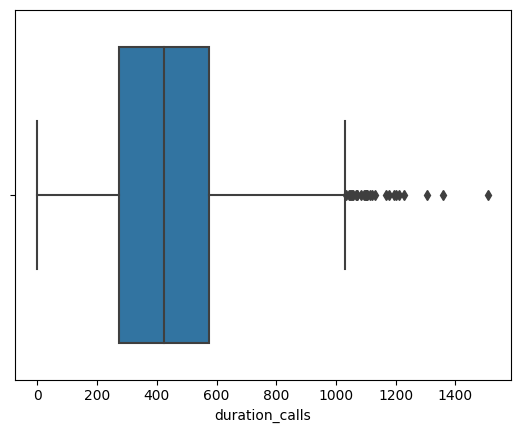

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(estadistic_surf['duration_calls'])
print()

<AxesSubplot:xlabel='duration_calls'>

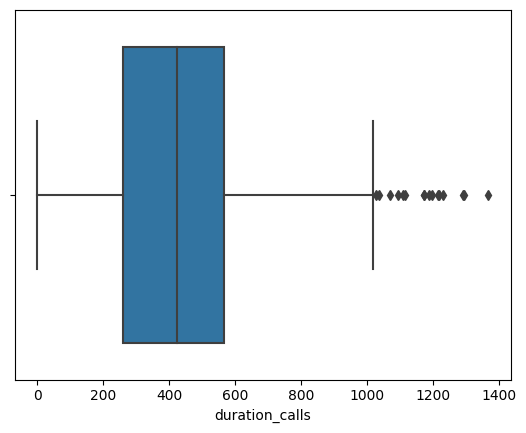

In [39]:
sns.boxplot(estadistic_ultimate['duration_calls'])

El bloxpot de ambos planes presenta rangos sin diferencias considerables, arrojando valores atipicos en torno a los 1000 y 1400 minutos de duración de llamadas.

Del grafico de barras, se observa que la duración promedio de llamadas por mes, es superior en plan surf en 6 meses,y de igual forma, es superior en plan ultimate en 6 meses. En cuento al histograma, se observa una distribución similar, pero en el caso de plan surf tiene frecuencias mayores por duración de llamadas.. Por último, el bloxpot de ambbos planes presenta rangos sin diferencias considerables, arrojando valores atipicos en torno a los 1000 y 1400 minutos de duración de llamadas.

### Mensajes

plan,mes_año,surf,ultimate
0,2018-01,21.0,62.0
1,2018-02,108.0,151.0
2,2018-03,351.0,243.0
3,2018-04,870.0,463.0
4,2018-05,1849.0,931.0
5,2018-06,2454.0,1379.0
6,2018-07,3271.0,1937.0
7,2018-08,4662.0,2732.0
8,2018-09,5968.0,3259.0
9,2018-10,8020.0,4181.0


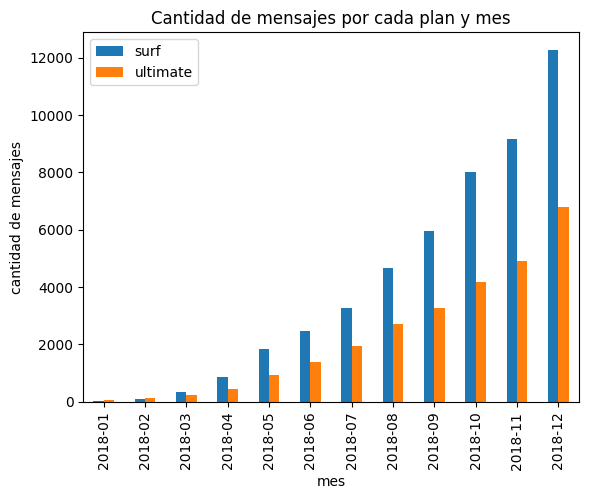

In [40]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

pivot_message = merged_df.pivot_table(index='mes_año',
                            columns='plan',
                            values='message_count',
                            aggfunc='sum'
                           ).reset_index()
display(pivot_message)



pivot_message.plot(x='mes_año',
        kind='bar',
        title='Cantidad de mensajes por cada plan y mes',
        xlabel='mes',
        ylabel='cantidad de mensajes')

plt.legend(['surf', 'ultimate'])
plt.show() 


Del gráfico se observa que la cantidad de mensajes va en aumento en cada plan, siendo los usuarios del plan surf los que envían mayor cantidad por mes.

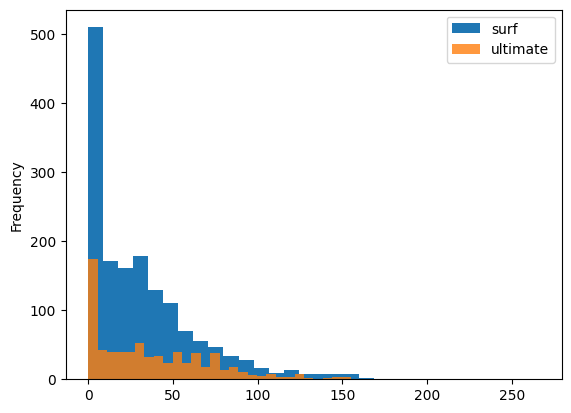

In [41]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

merged_df[merged_df['plan'] == 'surf']['message_count'].plot(kind='hist', bins=30)

merged_df[merged_df['plan'] == 'ultimate']['message_count'].plot(kind='hist', bins=30, alpha=0.8)

plt.legend(['surf', 'ultimate']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.show() 


Del gráfico se observa que por mes, los usuarios envían entre 0 y 100 mensajes. A pesar que el plan ultimate tiene en su plan la cantidad de 3000 mensajes incluidos en el mes, estos no superarían los 250 mensajes

**Calcula la media y la varianza de la cantidad mensual de mensajes.**

In [42]:
print("la media de mensajes enviados del plan surf es de ",estadistic_surf['message_count'].mean())
print("la varianza mensajes enviados del plan surf es de ", np.var(estadistic_surf['message_count']))

print()

print("la media de mensajes enviados del plan ultimate es de ",estadistic_ultimate['message_count'].mean())
print("la varianza mensajes enviados del plan ultimate es de ", np.var(estadistic_ultimate['message_count']))

la media de mensajes enviados del plan surf es de  31.15956770502225
la varianza mensajes enviados del plan surf es de  1126.008231726662

la media de mensajes enviados del plan ultimate es de  37.55138888888889
la varianza mensajes enviados del plan ultimate es de  1207.0779147376545


<AxesSubplot:xlabel='message_count'>

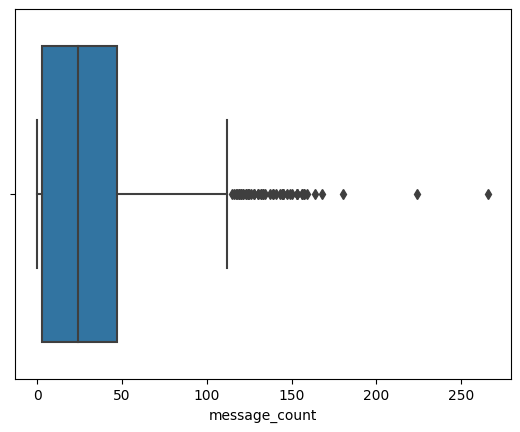

In [43]:
sns.boxplot(estadistic_surf['message_count'])

<AxesSubplot:xlabel='message_count'>

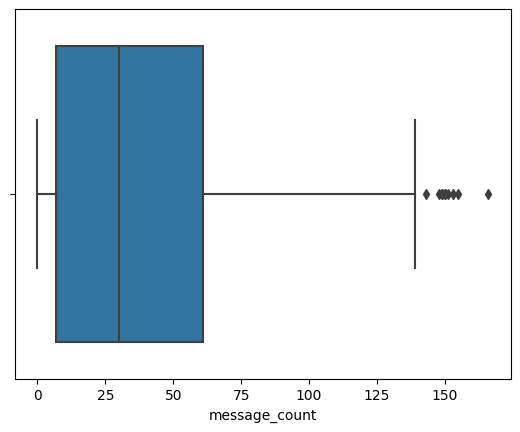

In [44]:
sns.boxplot(estadistic_ultimate['message_count'])

Del gráfico de barras se observa que la cantidad de mensajes a medida que transcurren los meses va en aumento para ambos planes
además, la cantidad de mensajes enviados es superior en todos los meses para el plan surf. Para el histograma no se presentan
diferencias considerables en su distribución, aunque las frecuencias para el plan surf siguen siendo superiores en todos los
meses. Por otro lado, del bloxpot se observa un mayor rango intercuarticlico para el plan ultimate y mayor disperción en la
cantidad de mensajes enviados, aunque cabe destacar que en plan surf presenta valores atípicos mas distantes del valor máximo 
del rango interuartilico.

### Internet

plan,mes_año,surf,ultimate
0,2018-01,10.0,29.0
1,2018-02,110.0,121.0
2,2018-03,312.0,221.0
3,2018-04,611.0,343.0
4,2018-05,1087.0,489.0
5,2018-06,1502.0,725.0
6,2018-07,2042.0,973.0
7,2018-08,2735.0,1267.0
8,2018-09,3238.0,1463.0
9,2018-10,4126.0,1878.0


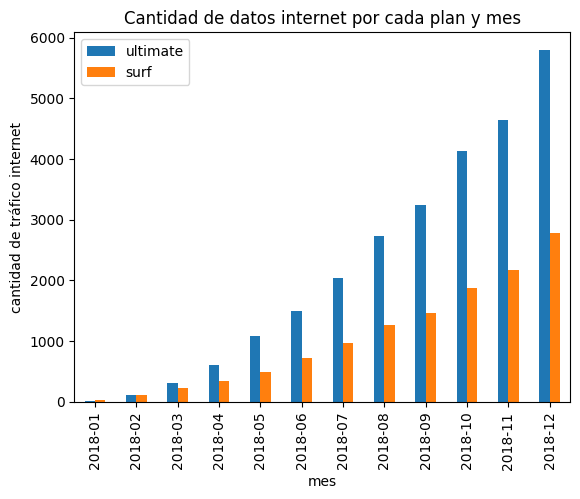

In [45]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

pivot_trafic = merged_df.pivot_table(index='mes_año',
                            columns='plan',
                            values='trafic_users',
                            aggfunc='sum'
                           ).reset_index()
display(pivot_trafic)



pivot_trafic.plot(x='mes_año',
        kind='bar',
        title='Cantidad de datos internet por cada plan y mes',
        xlabel='mes',
        ylabel='cantidad de tráfico internet')

plt.legend(['ultimate', 'surf'])
plt.show() 
 

Se observa un aumento en el consumo de la cantidad de datos de internet por cada plan a medida que transcurren los meses, siendo el plan últimate el que presenta mayores consumos respecto al plan surf.

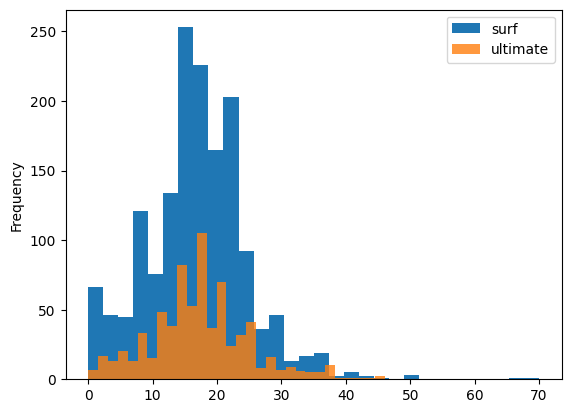

In [46]:
# Compara el tráfico de internet que necesitan los usuarios de cada plan. Traza un histograma.


merged_df[merged_df['plan'] == 'surf']['trafic_users'].plot(kind='hist', bins=30)

merged_df[merged_df['plan'] == 'ultimate']['trafic_users'].plot(kind='hist', bins=30, alpha=0.8)

plt.legend(['surf', 'ultimate']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.show() 

Se observa que la frecuencia de usuarios que envían mensajes es mayor en el plan surf respecto al plan ultimate.


In [47]:
# Calcula la media y la varianza de la cantidad mensual de datos de internet.


print("la media de datos utilizados del plan surf es de ",estadistic_surf['trafic_users'].mean())
print("la varianza datos utilizados del plan surf es de ", np.var(estadistic_surf['trafic_users']))

print()

print("la media de datos utilizados del plan ultimate es de ",estadistic_ultimate['trafic_users'].mean())
print("la varianza datos utilizados del plan ultimate es de ", np.var(estadistic_ultimate['trafic_users']))

la media de datos utilizados del plan surf es de  16.670692943420217
la varianza datos utilizados del plan surf es de  61.54444942447023

la media de datos utilizados del plan ultimate es de  17.306944444444444
la varianza datos utilizados del plan ultimate es de  58.748840663580246


<AxesSubplot:xlabel='trafic_users'>

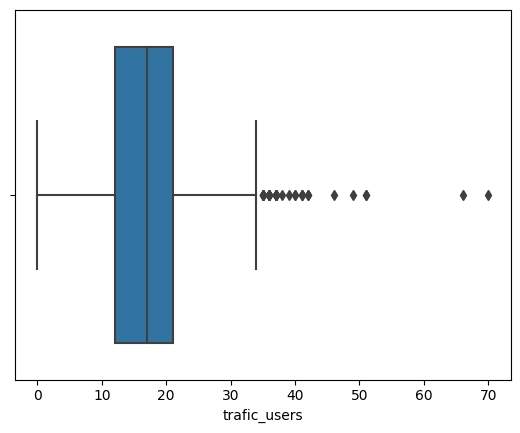

In [48]:
sns.boxplot(estadistic_surf['trafic_users'])

<AxesSubplot:xlabel='trafic_users'>

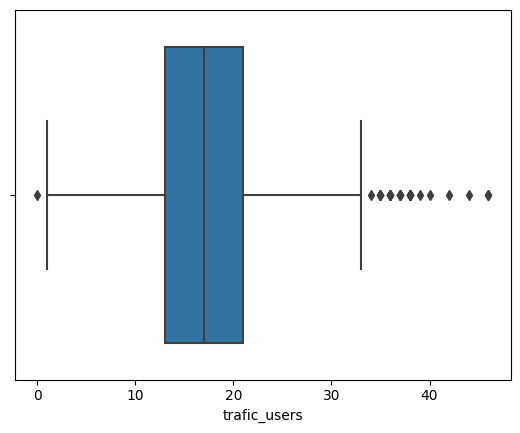

In [49]:
sns.boxplot(estadistic_ultimate['trafic_users'])

Podemos ver que el mayor consumo de internet de parte de los usuarios es para el ultimate en todos los meses, a su vez,
este plan presenta una menos dispersión respecto al plan surf.

## Ingreso

**Compara el ingreso promedio por cada plan y por cada mes. Traza un gráfico de barras.**

plan,mes_año,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.396667,70.000000
2,2018-03,45.941304,74.666667
3,2018-04,40.710600,73.000000
4,2018-05,47.628182,70.724138
5,2018-06,49.276289,71.638298
6,2018-07,62.674050,71.898305
7,2018-08,63.931173,72.859155
8,2018-09,58.271495,72.034884
9,2018-10,65.421224,72.311321


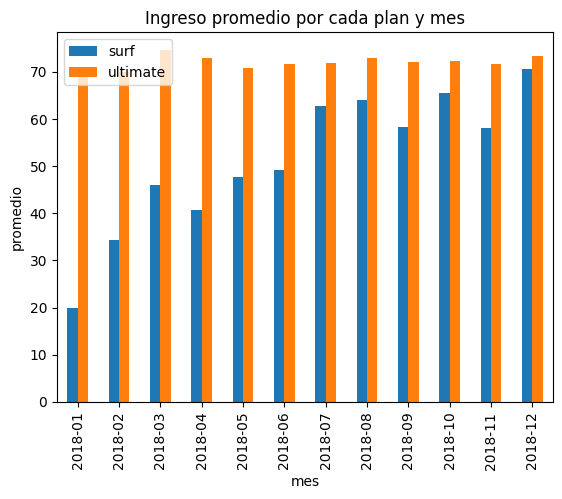

In [50]:
pivot_income = merged_df.pivot_table(index='mes_año',
                            columns='plan',
                            values='income_total',
                            aggfunc='mean'
                           ).reset_index()
display(pivot_income)

pivot_income.plot(x='mes_año',
        kind='bar',
        title='Ingreso promedio por cada plan y mes',
        xlabel='mes',
        ylabel='promedio')

plt.legend(['surf', 'ultimate'])
plt.show() 

Se observa que los ingresos en el plan ultimate son mayores respecto al plan surf en todos los meses y no presentan mayor variabilidad.

**Compara el ingreso mensual de los usuarios de cada plan. Traza un histograma.**

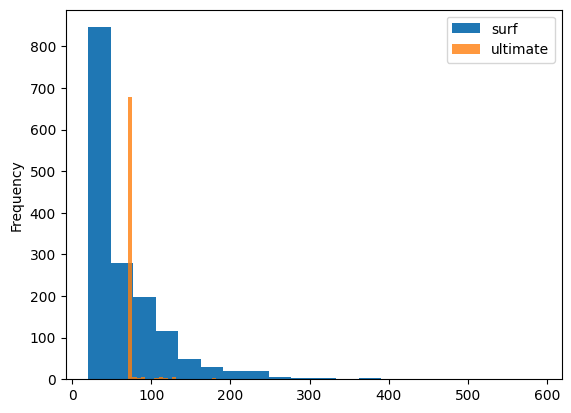

In [51]:
merged_df[merged_df['plan'] == 'surf']['income_total'].plot(kind='hist', bins=20)

merged_df[merged_df['plan'] == 'ultimate']['income_total'].plot(kind='hist', bins=20, alpha=0.8)

plt.legend(['surf', 'ultimate']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.show() 

Podemos ver que los ingresos de usuarios que optan por el plan ultimate se mantiene en torno a las 70 unidades monetarias. Esto refleja que los usuarios en su mayoría tienden a no utilizar mensajes, datos o llamadas extra a lo que incluye su plan (el cual tiene un costo de 70 unidades monetarias. Diferente es el caso de los usuarios que optan por el plan surf, en el que el gráfico muestra que la tarifa que pagan la mayoría de los usuarios va de 20 a 70 unidades monetarias. Tambien se visualiza que hay usuarios del plan surf que pueden llegar a superar las 200 unidades monetarias. Para estos casos sería preferible que cambiaran al plan ultimate el cual otorga mayores beneficios.

**Calcula la media y la varianza de los ingresos totales por plan.**

In [52]:
print("la media de datos utilizados del plan surf es de ",estadistic_surf['income_total'].mean())
print("la varianza datos utilizados del plan surf es de ", np.var(estadistic_surf['income_total']))

print()

print("la media de datos utilizados del plan ultimate es de ",estadistic_ultimate['income_total'].mean())
print("la varianza datos utilizados del plan ultimate es de ", np.var(estadistic_ultimate['income_total']))

la media de datos utilizados del plan surf es de  60.706408137317226
la varianza datos utilizados del plan surf es de  3065.8848438690247

la media de datos utilizados del plan ultimate es de  72.31388888888888
la varianza datos utilizados del plan ultimate es de  129.66814043209877


<AxesSubplot:xlabel='income_total'>

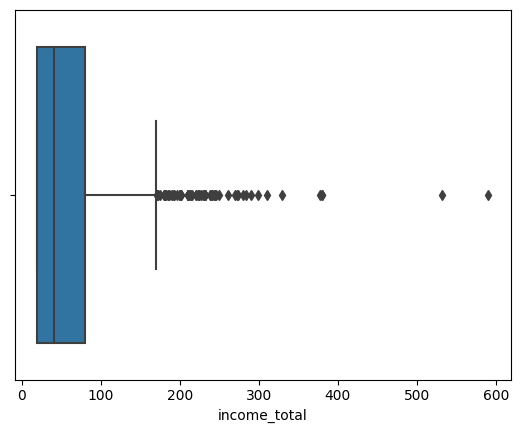

In [53]:
sns.boxplot(estadistic_surf['income_total'])

De los gráficos de barra y del histograma, se observa que la mayor recaudación es por parte de los usuarios que optan por plan
ultimate, esto se debe principalmente a que el cargo fijo mensual del plan ultimate es mayor al plan surf, manteniendose 
en los $70 en la mayoria de los casos. Sin embargo, el plan surf presenta mayor recaudación por ingresos extras, es decir, los 
usuarios que optan por este plan tienden a superar el limite del paquete.

## Prueba las hipótesis estadísticas

Prueba las hipótesis: 
Ho, los ingresos promedio de los usuarios de los planes Ultimate y Surf no son diferentes
H1, en caso contrario

In [54]:
alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(estadistic_surf['income_total'], estadistic_ultimate['income_total']) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula, existe diferencia en los ingresos de ambos planes")
else:
    print("No podemos rechazar la hipótesis nula")



valor p:  2.862674510698644e-08
Rechazamos la hipótesis nula, existe diferencia en los ingresos de ambos planes


Prueba las hipótesis: 
Ho, los ingresos promedio de los usuarios del área NY-NJ no son diferentes a usuarios de otras regiones
H1, en caso contrario

In [55]:
#unimos nuestro dataframe general con la información de la región del cliente.

merged_city = merged_df.merge(users[['user_id','city']], on ='user_id', how='left')


city_NY_NJ = merged_city[merged_city['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']

city_different = merged_city[merged_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

# Prueba las hipótesis

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis nula

results = st.ttest_ind(city_NY_NJ['income_total'], city_different['income_total']) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula, existe diferencia significativa en los ingresos de NY-NJ respecto a otras regiones")
else:
    print("No podemos rechazar la hipótesis nula")


#users["city"].head(20)
#display(users[users['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA'])


valor p:  0.043557431621342436
Rechazamos la hipótesis nula, existe diferencia significativa en los ingresos de NY-NJ respecto a otras regiones


## Conclusión general

Como conclusión general, se observa que la mayor recaudación es por parte de los usuarios que optan por plan
ultimate, esto se debe principalmente a que el cargo fijo mensual del plan ultimate es mayor al plan surf, manteniendose 
en los $70 en la mayoria de los casos. Sin embargo, el plan surf presenta mayor recaudación por ingresos extras, es decir, los 
usuarios que optan por este plan tienden a superar el limite del paquete, a consecuencia de esto, el plan surf presenta mayor
disperción respecto al plan ultimate. Cabe mencionar que aquellos usarios del plan surf que superan en su pago menusal las 70 unidades monetarias, les sería conveniente cambiar al plan ultimate, ya que este cuenta con mayor número de mensajes, llamadas y tráfico de internet, siendo su cargo fijo mensual es de 70 unidades monetarias.

Por otro aldo, de la prueba de hipotesis, demostramos que hay evidencia significativa de que los ingresos promedio de ambos
planes son diferentes, por lo que sería recomendable centrar los recursos y estrategias de distinta forma en cada plan.